## <center><b> FastSAM Enabled M&M Detection and Counting</center>
### <center><b>AISE 3350A FW24: Cyber-Physical Systems Theory</b></center>

<center>Group # 1:</center>
<center>Gui Moraes Brant De Almeida: 251301839</center>
<center>Joel Friesen Waldner: 251303569</center>
<center>Addy Virk: 251311740</center>
<center>Cristian Forero Duenas:250998245</center>
<br>
<center>Due December 20, 2024</center>

#**1. Introduction**
Image recognition (IR) is an integral part of modern artificial intelligence (AI) and and one of the most studied subfields of [computer vision](https://azure.microsoft.com/en-ca/resources/loud-computing-dictionary/what-is-computer-vision#object-classification) [[1]](#1)[[2]](#2). It enables machines to interpret and analyze visual information, which can come from a live camera feed or from pictures. IR is the foundation of numerous cyber-physical systems applications, from autonomous vehicles and facial recognition systems to healthcare diagnostics and industrial automation.

The ability to process and understand images effectively has revolutionized technology and influenced several industries, rewriting how data is used to solve real-world problems. One of the most important features of IR is its ability to accurately classify and differentiate between similar objects. A task that serves as an excellent gateway to explore this type of IR is using machine learning models to distinguish between different M&Ms and count them grouped by colours.

Designing a model to distinguish between different coloured M&Ms is foundational in learning and understanding image recognition. This step will help develop the foundational software to detect more complex patterns in industrial applications. Feature extraction, colour differentiation, and classification are introduced to this software, which can later be upgraded to be used in other contexts, like taking the tally of milk produced in a factory (by labels). Moreover, the model was tested with more complex images to account for actual conditions in the industry, such as different lighting, different textures, and possible imperfections in shape.

 In general, insights gained from these models can be scaled to more complex tasks, such as object detection in autonomous vehicles, medical imaging, or sorting systems in industries like manufacturing or package handling.

#**2. Methodology**
To count the number of candies in an image by their colour, a pre-trained segmentation model was implemented to identify candies, and then an unsupervised ML model was applied to group colours. Pretrained models provide the benefits of deep learning approaches without requiring large amounts of existing training data.

***2.1 Model Selection***

Three pre-trained models with zero-shot capabilities were researched and tested to find the best model for the candy inventory system. First was [You Only Look Once version 11 (YOLO11)](https://arxiv.org/abs/1506.02640) [[3]](#3), the latest iteration of one of the most popular image identification models. YOLO11 is an incredibly versatile object detection algorithm that can be used for segmentation, pose estimation, object recognition, and image classification. When tested on images of M&M candies, the model identified the different candies and attempted to provide a label, guessing what each object was.

It was determined that YOLO11 was not well suited to the task because its use cases are highly general. Much of the computational load was spent labelling the objects as candies. This is entirely unnecessary for the candy inventory system since it is assumed that all objects in the frame are the same kind of candy, just different colours. A more specialized model is preferred.

The next model tested was the [Segment Anything Model (SAM)](https://arxiv.org/abs/2306.12156) [[4]](#4). Trained on over one billion images, SAM is one of the largest existing convolutional neural networks. This model is trained specifically for segmentation, making it ideal for the candy inventory system. However, SAM was not implemented because it was found to take multiple minutes to segment single images of candy, far longer than ideal.

The final and best-performing model was a modified version of SAM called [FastSAM](https://arxiv.org/abs/2306.12156)[[5]](#5). FastSAM can achieve comparable accuracy as base SAM but in a small fraction of the processing time. When tested on images of candy that took SAM 100 seconds to segment, FastSAM could segment the image with nearly identical results in under ten seconds. Due to the high accuracy and breakneck speeds, FastSAM was selected as the pre-trained model for the candy inventory system.

***2.2 Segmentation***

The first step in counting M&Ms is segmenting the image using the FastSAM model. FastSAM uses YOLOv8 architecture with a transformer block and segmentation branch specially optimized for efficient image segmentation. The zero-shot segmentation implemented in this project determines bounding boxes by maximizing the intersection of the union of the image mask. The segmentation method returns a list of tuples containing the bounding box coordinates. These boxes contain each distinct object in the image identified by the algorithm.

***2.3 Filtering***

Once the bounding boxes have been determined, they must be filtered based on the task's domain-specific knowledge. Since the FastSAM model is pre-trained, its segmentation results contain artifacts due to the algorithm's extremely general-use nature. The most common issue is that because the model is trained to detect words, it segments the M on the candy as a separate entity, causing the candy to be counted twice. The other common issue is that extreme glare on candy can also be treated as a distinct entity.

Luckily, these issues can be resolved through a relatively simple filtering process. An algorithm that iterates through every pair of bonding boxes and obliterates every box inside another was implemented. Given that the candies are assumed to be uniform in size, one actual bounding box could not be contained in another, and no real candies should be removed from the count this way. The number of boxes after filtering is the number of candies the system counts.



***2.4 Colour Detection***

The last step is to separate the candies based on colour. Colour detection was performed through [k-mean clustering](https://ieeexplore.ieee.org/abstract/document/7724848) [[6]](#6), a standard unsupervised machine learning algorithm. It works by taking the RGB values of every pixel in a bounding box and clustering them into groups of similar colours. Then, determining the candy's colour is performed by finding which cluster has the most values of the same candy colour and taking the average value of this cluster.

Finding the dominant colour with k-mean clustering was resilient against camera artifacts and noise. Additionally, it is primarily unaffected by the overlap between boxes and the surrounding colours, two sources of error that significantly reduced the accuracy of other methods like averaging the colours or finding the modal RGB values.

The downside of k-mean clustering is its higher cost since it needs to compare the RGB values of each pixel to the averages of each cluster; however, this increased cost was insignificant compared to what was already being used for segmentation.

After clustering finds the dominant colour of each bounding box, these continuous values need to be grouped into a human-interpretable set of colours (i.e. red, green, etc.).

Using predefined ranges is highly efficient as it is practically computationally trivial. However, this method has limited robustness. The main limitation is that different lighting conditions may shift the colours in the image away from the ranges. For example, very orange lighting may cause all yellow candies to be counted as orange.

To improve robustness, future work could implement a deep learning approach to colour identification that groups colours based on an understanding of the luminance and colour pallet of the entire image. This approach was not implemented in this project due to a lack of training data.

#**3. Results**

***User Manual***

1. **Install Dependencies:** When running the main code cell, the code will automatically install the required Python libraries. Wait for the installation to complete so the necessary libraries are installed and the interface appears.
2. **Upload Required Files:** In the interface, press the “Choose File” button when prompted to upload the images of M&Ms.
3. **Process the Image and View Results:** After uploading the image, click the “Process Image” button in the interface. Wait for the program to complete the segmentation and colour detection. The text output will display the total number of M&Ms detected and the count for each colour. Then, an image of the analyzed picture will be displayed with boxes around the detected M&Ms.
4. **Save Results:** Press the “Save Results” button to save the results as a JSON file on your local machine.
5. **Clear or Reset:** Press the ‘Clear’ button to go back to the original interface before any image analysis or press “Load Image” to import another image
6. **Exit:** Exit the interface by closing the application.

#**3.1 Simple Image Analysis**

\
***3.1.1 Actual vs Code Results***

**Sample Test Images**

<table>
  <tr>
    <td style="text-align: center;">
      <img src="Images\3.1\MM1.png" width="319">
      <br>
      <span>Figure 1: M&M Image 1</span>
    </td>
    <td style="text-align: center;">
      <img src="Images\3.1\MM2.png" width="410">
      <br>
      <span>Figure 2: M&M Image 2</span>
    </td>
    <td style="text-align: center;">
      <img src="Images\3.1\MM3.png" width="310">
      <br>
      <span>Figure 3: M&M Image 3</span>
    </td>
  </tr>
</table>

\
**Table 1: Actual Value**

Figure|Red|Orange|Blue|Green|Yellow|Brown|Total Count|
------|---|------|----|-----|------|-----|-----------|
1     | 12|     2|  9 |    9|     5|    1|         38|
2     | 11|     8| 10 |   13|     8|    3|         53|
3     | 11|     4| 10 |    8|     8|   10|         51|

\

<table>
  <tr>
    <td style="text-align: center;">
      <img src="Images\3.1\Result1.png" width="700">
      <br>
      <span>Figure 4: M&M Image 1 Results</span>
    </td>
  </tr>
  <tr>
    <td style="text-align: center;">
      <img src="Images\3.1\Result2.png" width="700">
      <br>
      <span>Figure 5: M&M Image 2 Results</span>
    </td>
  </tr>
  <tr>
    <td style="text-align: center;">
      <img src="Images\3.1\Result3.png" width="700">
      <br>
      <span>Figure 6: M&M Image 3 Results</span>
    </td>
  </tr>
</table>


\
**Table 2: Code Result**

Figure|Red|Orange|Blue|Green|Yellow|Brown|Unknown|Total Count|
------|---|------|----|-----|------|-----|-------|-----------|
1     | 12|     1|  9 |    8|     6|    0|      1|         37|
2     | 11|     7| 13 |   11|     7|    2|      2|         53|
3     | 10|     2| 11 |    9|     7|    8|      3|         50|

\
***3.1.2 Evaluation Metric Analysis***

The True Positives (TP) represent the number of M&Ms correctly classified as their true color by the code.

The False Positives (FP) indicate the M&Ms incorrectly classified as a color they are not.

The True Negatives (TN) represent M&M's of other colors that are correctly not classified as the color in question.

The False Negatives (FN) indicate M&M's present in the image that were missed entirely or incorrectly classified as a different color.

\
**Table 3: Code Result Analysis for Figure 1**

Result Type     |Red |Orange|Blue|Green|Yellow|Brown|Unknown|Not Detected|
----------------|----|------|----|-----|------|-----|-------|------------|
True Positives  |  12|     1|   9|    8|     5|    0|  NA   |          NA|
False Positives |   0|     0|   0|    0|     1|    0|   1   |           1|
True Negatives  |  26|    36|  29|   29|    33|   37|  NA   |          NA|
False Negatives |   0|     1|   0|    1|     0|    1|  NA   |          NA|
Total           |  12|     2|   9|    9|     5|    1|  NA   |          NA|

\
**Table 4: Code Result Analysis for Figure 2**

Result Type     |Red |Orange|Blue|Green|Yellow|Brown|Unknown|Not Detected|
----------------|----|------|----|-----|------|-----|-------|------------|
True Positives  |  10|     6|  10|   11|     7|    2|  NA   |          NA|
False Positives |   1|     1|   3|    0|     0|    0|   2   |           0|
True Negatives  |  41|    44|  40|   40|    45|   50|  NA   |          NA|
False Negatives |   1|     2|   0|    2|     1|    1|  NA   |          NA|
Total           |  11|     8|  10|   13|     8|    3|  NA   |          NA|

\
**Table 5: Code Result Analysis for Figure 3**

Result Type     |Red |Orange|Blue|Green|Yellow|Brown|Unknown|Not Detected|
----------------|----|------|----|-----|------|-----|-------|------------|
True Positives  |   8|     2|  10|    7|     5|    7|  NA   |          NA|
False Positives |   2|     0|   1|    2|     2|    1|   3   |           1|
True Negatives  |  38|    47|  40|   41|    41|   40|  NA   |          NA|
False Negatives |   3|     2|   0|    1|     3|    3|  NA   |          NA|
Total           |  11|     4|  10|    8|     8|   10|  NA   |          NA|

\
Key Observations
 - True Positives + False Positives Yields Code Results
 - True Positives + False Negatives Yields Actual Values
 - False Negatives Total = False Positives Total

In the Confusion Matrix (CM), only the look at the classes of each M&M colour will be discussed and omit Unknown and Not Detected since there is a focus on how successfully the code classifies each colour. Unknown and Not Detected in False Positives only explains the missing values from each class resulting from the code.

\
**Table 6: Confusion Matrix(CM) Values**

Figure|Total TP| Total FP| Total TN | Total FN|
------|--------|---------|----------|---------|
1     |      35|        1|       190|        3|
2     |      46|        5|       260|        7|
3     |      39|        8|       247|       12|

\
**Confusion Matrixes**

<table>
  <tr>
    <td style="text-align: center;">
      <img src="Images\3.1\Figure_1_Confusion_Matrix.png" width="400">
      <br>
      <span>Figure 7: CM for Code Analysis Figure 1</span>
    </td>
    <td style="text-align: center;">
      <img src="Images\3.1\Figure_2_Confusion_Matrix.png" width="400">
      <br>
      <span>Figure 8: CM for Code Analysis Figure 2</span>
    </td>
    <td style="text-align: center;">
      <img src="Images\3.1\Figure_3_Confusion_Matrix.png" width="400">
      <br>
      <span>Figure 9: CM for Code Analysis Figure 3</span>
    </td>
  </tr>
</table>

\
**Formulas for Metrics**

Precision Measures the proportion of true positive predictions out of all positive predictions
 - Precision = $\frac{TP}{TP+FP}$

Recall/True Positive Rate (TPR), measures the proportion of actual positives correctly identified.
 - Recall/TPR = $\frac{TP}{TP+FN}$

F1-Score is the harmonic mena of Precision and Recall, providing a balanced metric that considers both false positives and false negatives.
 - F1-Score = $2*\frac{Precision*Recall}{Precision+Recall}$

Accuracy measures the proportion of correct predictions (both positive and negative) out of the total predictions.
 - Accuracy = $\frac{TP + TN}{TP+FP+TN+FN}$

False Positive Rate measures the proportion of actual negatives incorrectly identified as positives
 - FPR = $\frac{FP}{FP+TN}$

Area Under the ROC Curve (AUC-ROC): AUC-ROC is calculated as the area under the ROC curve, plotted using FPR on the x-axis and TPR on the y-axis. It evaluates the model's performance at distinguishing between M&M colours, with 1.0 indicating perfect classification by the code and 0.5 representing the code randomly guessing.


\
**Table 7: Evaluation Metric Results**

Figure|Precision|Recall|F1-Score|Accuracy|ROC-AUC
------|---------|------|--------|--------|-------|
1     |  0.97   | 0.92 | 0.95   | 0.98   |   0.98|
2     |  0.90   | 0.87 | 0.88   | 0.96   |   0.94|
3     |  0.83   | 0.76 | 0.80   | 0.93   |   0.90|

\
<table>
  <tr>
    <td style="text-align: center;">
      <img src="Images\3.1\Evaluation_Metric_Comparison.png" width="600">
      <br>
      <span>Figure 10: Evaluation Metric Comparison for Figures</span>
    </td>
  </tr>
  <tr>
    <td style="text-align: center;">
      <img src="Images\3.1\ROC_Curves.png" width="600">
      <br>
      <span>Figure 11: ROC Curves for Figures</span>
    </td>
  </tr>
  <tr>
</table>

\
#**3.2 Complex Image Analysis**

\
***3.2.1 Actual vs Code Results***

**Complex Test Image**

<table>
  <tr>
    <td style="text-align: center;">
      <img src="Images\3.2\ComplexImage.jpg" width="500">
      <br>
      <span>Figure 11: Complex M&M Image</span>
    </td>
  </tr>
</table>

\
**Table 8: Actual Value**

Figure|Red|Orange|Blue|Green|Yellow|Brown|Total Count|
------|---|------|----|-----|------|-----|-----------|
11    | 29|    36| 24 |   33|    28|   28|        178|


\
<table>
  <tr>
    <td style="text-align: center;">
      <img src="Images\3.2\CIResult.png" width="700">
      <br>
      <span>Figure 12: M&M Image Complex Results</span>
    </td>
  </tr>
</table>

\
**Table 9: Code Result**

Figure|Red|Orange|Blue|Green|Yellow|Brown|Unknown|Total Count|
------|---|------|----|-----|------|-----|-------|-----------|
11    | 26|    35|  24|   33|    32|   22|      5|        177|

\
***3.2.2 Evaluation Metric Analysis***


**Table 10: Results of Complex Analysis**

Result Type     |Red |Orange|Blue|Green|Yellow|Brown|Unknown|Not Detected|
----------------|----|------|----|-----|------|-----|-------|------------|
True Positives  |  24|    33|  22|   31|    24|   20|  NA   |          NA|
False Positives |   2|     2|   2|    2|     8|    2|   5   |           1|
True Negatives  | 147|   140| 152|  143|   142|  148|  NA   |          NA|
False Negatives |   5|     3|   2|    2|     4|    8|  NA   |          NA|
Total           |  29|    36|  24|   33|    28|   28|  NA   |          NA|

\
Similar to Table 6, only the classes of each M&M colour will be discussed and omit Unknown and Not Detected since there is a focus on how successfully the code classifies each colour. Unknown and Not Detected in False Positives only explains the missing values from each class resulting from the code.

\
**Table 11: Confusion Matrix(CM) Values**

Figure|Total TP| Total FP| Total TN | Total FN|
------|--------|---------|----------|---------|
1     |     154|       18|       872|       24|

\
**Confusion Matrix for Complex Analysis**
<table>
  <tr>
    <td style="text-align: center;">
      <img src="Images\3.2\Complex_Image_Confusion_Matrix.png" width="400">
      <br>
      <span>Figure 13: Complex Image Confusion Matrix: </span>
    </td>
  </tr>
</table>

\

**Table 12: Evaluation Metric Results**

Figure|Precision|Recall|F1-Score|Accuracy|ROC-AUC
------|---------|------|--------|--------|-------|
11     |  0.9    | 0.87 | 0.88   | 0.96   |   0.94|

\
#**3.3 Comparing Both Simple and Complex Image Analysis**

\
<table>
  <tr>
    <td style="text-align: center;">
      <img src="Images\3.3\Comparing_ROC_Curves.png" width="600">
      <br>
      <span>Figure 14: Comparing ROC Curves for Simple Analysis and Complex Analysis</span>
    </td>
  </tr>
  <tr>
    <td style="text-align: center;">
      <img src="Images\3.3\Evaluation_Metric_Comparison_All.png" width="600">
      <br>
      <span>Figure 15: Evaluation Metrics Comparison for Complex and Simple Analysis Figures</span>
    </td>
  </tr>
  <tr>
</table>



#**4. Discussion**

#**4.1 Simple Image Evaluation**

The comparison of Table 1 (Actual value) and Table 2 (Code Result) reveals key insights into the performance of the M&M detection system across Figures 1, 2, and 3 and served as a preliminary evaluation of performance metrics based on confusion metric values.

The evaluation of performance metrics focuses exclusively on the classes of each M&M colour, omitting the "Unknown" and "Not Detected" categories. These categories, represented in the False Positive row of Tables 3 to 5, help explain discrepancies in classification but are not used in calculating precision, recall, accuracy, F1-score, or ROC curves. By omitting those categories, the metrics provide a focused view of the system's ability to classify M&M colours accurately. The performance metrics and each figure associated with AUC measure the system's ability to distinguish between M&M colours. The following breakdown assesses each figure's result from Tables 3 to 5 alongside their corresponding metrics and trends.

\
***4.1.1 Figure 1 Evaluation***

The system performed well in detecting red and blue M&Ms, correctly identifying all red and blue M&Ms, showing a strong performance for these colours. However, the system struggled with orange and green M&Ms, undercounting them by one each and overcounting yellow by one. The brown M&M was missed entirely and assumed to be classified as "unknown." The total count was 37 compared to 38, suggesting one M&M was missed entirely. Despite this, the results for Figure 1 show a relatively high alignment between actual and predicted values.

*Table 3 Results*

The True Positives(TP) for red and blue M&Ms were perfect, reflecting the system's strong detection of these colours. However, False Negatives (FN) for orange, green, and brown M&Ms reveal the underclassification issues. Additionally, the "Not Detected" value in the False Positive (FP) category explains the discrepancy in total count between Table 1 (Actual Results) and Table 2 (Code Results).


*Performance Metrics*
- Precision(0.97): High precision reflects minimal FPs, consistent with the accurate classification of most M&M colours.
- Recall(0.92): Slightly lower recall captures the missed M&Ms (FN = 3) across various colors.
- F1-Score(0.95): The strong precision and slightly lower recall are balanced.
- Accuracy(0.98): Indicates nearly perfect overall classification performance.
- ROC-AUC(0.98): Signifies excellent colour prediction capability with minimal errors.

*ROC Curve Interpretation*

The high ROC-AUC values confirm the system's ability to effectively distinguish between M&M colours, aligning with the strong results observed in Table 3.

\
***4.1.2 Figure 2 Evaluation***

The system maintained strong detection for red M&Ms, but overcounted blue M&Ms by three and undercounted all other colours by 1 or 2 M&Ms. Two M&Ms were classified as "unknown," indicating some difficulty in correctly detecting specific colours. Despite the misclassifications, the total count matched the actual value of 53, suggesting that while all M&Ms were accounted for, some were classified into the wrong categories.

*Table 4 Results*

The TP for red and blue M&Ms was substantial; however, blue M&Ms were overclassified (FP = 3). The misclassification for other colours represented as FN and two "Unknown" classifications explain the errors in Table 2(Code Analysis).

*Performance Metrics*
- Precision(0.90): A decline is seen compared to Figure 1's evaluation due to the overclassification of blue M&M's and misclassification of other colours.
- Recall(0.87): Lower recall reflects the missed M&Ms (FN = 7) across different colors.
- F1-Score(0.88): Balances the lower precision and recall
- Accuracy(0.96): High overall correctness despite some misclassifications.
- ROC-AUC(0.94): Indicates strong but slightly reduced classification performance.

*ROC Curve Interpretation*

The high ROC-AUC values confirm the system's ability to distinguish between M&M colours effectively; however, this result is lower than Figure 1 due to the declines in precision and recall.

\
***4.1.3 Figure 3 Evaluation***

Figure 3 presented the most challenges for the system, most likely because M&Ms were covered by other M&Ms. Blue and green M&Ms were overcounted by one each, while all other M&Ms were undercounted by 1 or 2. Also, the system classified 3 M&Ms as "unknown." The total count was 50 compared to the actual 51, similar to Figure 1, indicating one M&M was missed entirely.

*Table 5 Results*

The overlapping M&Ms led to increased FPs for blue and green M&Ms and FNs for the remaining colours, highlighting the system's struggles with overlapping objects. The "Not Detected" value in the False Positive (FP) category explains the discrepancy in total count between Table 1 (Actual Results) and Table 2 (Code Results).

*Performance Metrics*
- Precision(0.83): Declined due to increased FPs for multiple colours.
- Recall(0.76): Lower recall reflects the high number of missed M&Ms (FN = 12) across various colors.
- F1-Score(0.80): Balances the lower precision and recall.
- Accuracy(0.93): The system's difficulty with overlapping M&Ms is reflected by the reduced accuracy.
- ROC-AUC(0.90): Highlights the decline in classification performance.

*ROC Curve Interpretation*

The lower ROC-AUC value indicated reduced effectiveness in distinguishing M&M colours due to overlapping challenges, consistent with Table 5's results.

***4.1.4 Looking at Trends***

The system's performance across all figures reveals a clear trend: introducing more M&Ms and overlapping objects worsens the classification performance. In Figure 1, where M&Ms were relatively separated, the system achieved high evaluation metrics. In Figure 2, adding more M&Ms increases misclassifications, leading to a slight decline in metrics. In Figure 3, overlapping M&Ms introduced significant challenges, resulting in lower evaluation metrics.

This trend indicates that the system performs well with a very simple image, but it struggles with increased complexity when M&Ms are added and overlap.

To explore how the system performs with larger and more complex images, next an image containing 178 M&M's with overlapping will be analyzed.

#**4.2 Complex Image Evaluation**

The complex image containing 178 M&Ms allows us to assess the system's performance on a larger, more challenging dataset. Unlike more straightforward images, the larger sample size tests the system's scalability and ability to maintain strong metrics in more complex scenarios. The rationale is that smaller sample sizes, as seen in Figures 1 to 3, may amplify errors due to the limited number of M&Ms. In contrast, a larger image could dilute these minor errors, providing a more comprehensive evaluation of the system's performance. The aim to assess whether the system maintains or improves its evaluation metrics when dealing with large-scale image processing scenarios. This will help determine if smaller datasets constrain the system's performance or if it can scale effectively to handle more significant inputs.

Similar to the analysis for Figures 1 to 3, the "Unknown" and "Not Detected" categories are omitted from the confusion matrix and evaluation metrics, as the focus is only on the classification of M&M colours. These excluded categories are explained in FPs and help identify missing values but do not contribute to any evaluation metric.

*4.2.1 Figure 11 Evaluation*

The larger dataset and overlapping M&Ms in Figure 11 presented successes and challenges for the system. The system performed well for orange, blue and green M&Ms, with relatively low FNs and FPs. However, red M&Ms showed moderate underclassification with 3 FNs, and brown M&Ms posed the most difficulty with 8 FNs, highlighting a significant struggle in detection. Yellow M&Ms were overclassified, leading to the highest FPs (FP = 8) among all colours. The "Not Detected" category in the FP row explains the discrepancies in total count between Table 8 (Actual Results) and Table 9 (Code Results).

*Performance Metrics*
- Precision(0.90): High precision indicates the system avoided most false positives despite the overclassification of yellow M&Ms.
- Recall(0.87): Lower recall reflects the missed M&Ms, mostly in the red and brown categories (FN = 24)
- F1-Score(0.88): Balances the precision and lower recall.
- Accuracy(0.96): Indicates strong overall performance, with the majority of M&Ms classified correctly despite minor errors.
- ROC-AUC(0.94): Demonstrates the system's strong ability to distinguish between M&M colours, even with a larger sample size and the presence of overlapping objects.

#**4.3 Comparing Simple and Complex Image Evaluation**

The comparison between the more straightforward images and the complex image highlights key trends in the system's performance across varying dataset complexities. The ROC curves (Figure 14) and evaluation metric comparisons (Figure 15) provide important insights into how the system scales when processing larger datasets with overlapping objects.

***ROC Curve Analysis***

As shown in Figure 14, the ROC-AUC for Figure 11 (0.94) is comparable to Figure 2 (0.94) and slightly lower than Figure 1 (0.98). Despite the increased dataset size and overlapping objects in Figure 11, the ROC-AUC remains high, demonstrating that the system retains strong classification capabilities even with greater complexity.

***Evaluation Metric Comparison***

Figure 15 directly compares precision, recall, F1-score, accuracy, and ROC-AUC across all figures.
 - Precision: Figure 11 maintains high precision (0.9), surpassing Figure 3(0.83) and the same as Figure 2 (0.9). This reflects the system's ability to minimize false positives, even with a larger dataset.
 - Recall: Figure 11 shows improved recall (0.87) compared to Figure 3 (0.76) but slightly lower than both Figures 1 (0.92) and 2 (0.87). This indicates that while the system identified most M&Ms, challenges with specific colours like brown or yellow reduced its recall.
 - F1-Score: The F1-Score for Figure 11(0.88) reflects a balanced performance showing improvement over Figure 3 (0.8) and consistency with Figure 2 (0.88)
 - Accuracy: Figure 11 achieves an accuracy of 0.96, the same as Figure 2 (0.96) and below Figure 1(0.98). The metric confirms that most M&M's were correctly classified despite minor errors.
 - ROC-AUC: The high AUC value for Figure 11 confirms its robust classification performance across a larger and more complex dataset despite some struggles with overlapping objects and FNs.

***Insights From Trends***

The evaluation metrics and ROC curves reveal that the system's performance trends depend heavily on dataset complexity.

Simple Images (Figures 1 to 3)
 - High performance in Figure 1 is driven by the separation of M&Ms, leading to minimal FPs and FNs.
 - Figures 2 and 3 show performance declines as the number of M&Ms increases and overlapping objects are introduced. These declines are evident by the reduced recall and ROC-AUC.

Complex Image (Figure 11)
 - The larger dataset dilutes minor errors observed in more straightforward images, leading to improved evaluation metrics compared to Figure 3.
 - Overclassification (yellow M&Ms) and underclassification (brown M*Ms) contribute to reduced precision and recall compared to Figure 1.

***Conclusion of Comparison***

The system can scale effectively, retaining high evaluation metrics even in a more complex dataset (Figure 11). As shown in Figures 14 and 15, the larger dataset dilutes the impact of minor errors, resulting in comparable or improved metrics relative to more straightforward images. However, recurring challenges with overlapping objects and specific colours highlight areas for improvement. OptimizingOptimizing the system for ambiguous cases and overlapping objects could further enhance its accuracy and scalability for real-world applications.


#***4.4 Social Impact***

The applications of image recognition are vast, as they allow computers to understand what is shown to them. This allows the machines to process image data precisely and sort images to solve problems. For instance, IBM utilized computer vision in the 2018 Master golf tournament to create clips of important moments. A clip of that moment was created whenever a significant shot was taken. Google Translate allows you to translate images in a foreign language to your language by scanning the writing. Self-driving cars, such as Tesla’s cars, utilize computer vision to process camera and sensor data, guiding the car and making real-time decisions on the inputs provided.

***Recommendations for future work***

Image recognition technology has transformed industries and society, offering solutions that enhance efficiency, safety, and accessibility. In healthcare, it aids early diagnosis and treatment by detecting diseases in medical images, improving outcomes and accessibility. Public safety benefits include crime prevention, disaster response, and traffic management. It also revolutionizes accessibility for individuals with disabilities, enabling tools like object identification and real-time translation. Automation driven by image recognition boosts productivity in manufacturing and logistics, but it also raises ethical concerns and economic challenges. These include:

- **Privacy and Surveillance:** Overuse in public spaces risks infringing privacy.

- **Bias and Fairness:** Algorithms may perpetuate discrimination without diverse training datasets.

- **Job Displacement:** Automation could disrupt labour markets, necessitating workforce upskilling.

While this technology can potentially improve lives and foster innovation, addressing these challenges through fairness, inclusivity, and transparency is essential to ensure equitable and sustainable benefits.

#**5. Conclusion**

Through this project, key strategies of computer vision were researched and applied to task of image recongnition and counting. Computer vision was explored through testing pre-trained models, optimzing their performance, and analyzing their efficiency. Discussion was carried out on the importance of model specialization, the model's sensitivity to environmental conditions, the model's scalability, and the applications and ethical concerns of rapidily evolving AI.

Choosing the proper model was found to considerably improved the results in early stages of design. Initially, the YOLO11 model was considered, but due to its generalization of images, the model struggled to perform efficiently as it spent a considerable amount of time deciding whether the images were candy. The use of SAM improved its performance considerably, as it was assumed that the model would always analyze candies whose differences would only be in colour. Then, SAM was substituted by its improved version, FastSAM. Therefore, choosing the correct model for the specific task was key to reaching the desired results.

Then, aspects outside the obvious programming realm had to be considered. In industry, images may be subject to glare or different lighting patterns. Even though the project scope allowed for ideal images, non-ideal environments also had to be considered to tune the model's performance for more realistic cases. Brainstorm possible obstacles to the machine's pattern identification was vital to create a robust and adaptable model. This key insight could not be fully integrated, as the project scope did not allow for grander implementations of deep learning algorithms.


Throughout testing, it became clear that the model was efficient and could identify many different M&Ms while maintaining metrics. Early results from simpler images revealed high accuracy and robustness. However, as complexity increased - either through the addition of more candies or overlapping objects - the model's performance began to decline, particularly with specific colors like brown and yellow. Overlapping candies were a consistent challenge as seen by reduced recall and increased FPs and FNs in these scenarios. Scalability was tested and revealed that the smaller datasets penalized errors more significantly. In simpler images, a small number of FPs or FNs had a noticeable impact on metrics such as precision and recall. Larger datasets diluted the effect of individual errors, resulting in better overall metrics despite the presence of challenges like overlapping M&Ms or ambiguous colors. This trend highlights the system's ability to scale effectively, maintaining strong metrics when processing larger and more complex datasets. Addressing issues related to overlapping objects and specific colors remains essential for further improving the model's performance in later versions of the software and ensuring its scalability to real-world scenarios.

Finally, to conclude the project, the potential applications of Image Recognition software are straightforward and vast, allowing computers to "see," expanding the realm of automation to the visual dimension. This completely removes the human aspect of several processes, like taking the tally of goods for trading or even driving. The project also exposed the threat this could pose to society, as computers may invade others' privacy without their knowledge. Finally, this could have economic impacts, affecting several jobs through improving processes.


#**6. References**
<a id="1">[1]</a> Microsoft Azure. “What is computer vision?” Object classification and more. Retrieved December 2, 2024, from https://azure.microsoft.com/en-ca/resources/cloud-computing-dictionary/what-is-computer-vision#object-classification

<a id="2">[2]</a> IBM. “Computer vision: Overview and applications,” Retrieved December 2, 2024, from https://www.ibm.com/topics/computer-vision

<a id="3">[3]</a> J. Redmon, *et al.*, “You only look once: Unified, real-time object detection,” Computer Vision and Pattern Recognition, arXiv:1506.02640v5, May. 9, 2016.

<a id="4">[4]</a> A. Kirillov, *et al.*, “Segment anything,” Meta AI Research FAIR, arXiv:2304.02643v, Apr. 5, 2023.

<a id="5">[5]</a> X. Zhao, *et al.*, “Fast segment anything,” Computer Vision and Pattern Recognition, arXiv:2306.12156, Jun. 21, 2023.

<a id="6">[6]</a> IshuGarg, B. Kaur, “Color based segmentation using K-mean clustering and watershed segmenation,” International Conference on Computing for Sustainable Global Development, Mar. 16, 2016.



In [1]:
import os
import json
import numpy as np
import cv2
from ultralytics import FastSAM
from PIL import Image, ImageTk
import tkinter as tk
from tkinter import ttk, filedialog

In [3]:
# Load the pre-trained FastSAM model
model = FastSAM("FastSAM-x.pt")

# Define HSV color ranges for different M&M colors
colour_ranges = {
    'red': {
        'lower1': np.array([0, 100, 100]),
        'upper1': np.array([5, 255, 255]),
        'lower2': np.array([165, 100, 100]),
        'upper2': np.array([180, 255, 255])
    },
    'orange': {
        'lower': np.array([6, 100, 100]),
        'upper': np.array([15, 255, 255])
    },
    'blue': {
        'lower': np.array([81, 100, 100]),
        'upper': np.array([140, 255, 255])
    },
    'green': {
        'lower': np.array([40, 100, 100]),
        'upper': np.array([80, 255, 255])
    },
    'yellow': {
        'lower': np.array([15, 100, 100]),
        'upper': np.array([35, 255, 255])
    },
    'brown': {
        'lower': np.array([0, 20, 0]),
        'upper': np.array([30, 255, 100])
    }
}

# Variable to store the path of the currently loaded image
current_image_path = None

def convert_xyxy_to_xywh(bboxes):

    """
    Converts bounding box coordinates from (x1, y1, x2, y2) to (x, y, w, h).

    Parameters:
    - bboxes: List of bounding box coordinates in the form [x1, y1, x2, y2]

    Returns:
    - List of bounding boxes in the form [x, y, w, h]
    """

    converted_bboxes = []
    for bbox in bboxes:
        x1, y1, x2, y2 = bbox.xyxy[0]
        x = int(x1)
        y = int(y1)
        w = int(x2 - x1)
        h = int(y2 - y1)
        converted_bboxes.append([x, y, w, h])
    return converted_bboxes

def exclude_contained_bboxes(bboxes, img):

    """
    Excludes bounding boxes that are completely contained within other bounding boxes
    and those that take up more than half the image.

    Parameters:
    - bboxes: List of bounding box coordinates in the form [x, y, w, h]
    - img: The original image as a NumPy array.

    Returns:
    - A new list of bounding boxes excluding those completely contained within others
      and those that take up more than half the image.
    """

    def is_contained(box1, box2):

        """
        Check if box1 is completely contained within box2.
        """

        x1, y1, w1, h1 = box1
        x2, y2, w2, h2 = box2
        return x1 >= x2 and y1 >= y2 and (x1 + w1) <= (x2 + w2) and (y1 + h1) <= (y2 + h2)

    # Image dimensions
    img_height, img_width = img.shape[:2]
    img_area = img_width * img_height

    # Filter out bounding boxes that take up more than half the image
    # This is necessary because sometimes the entire image is placed inside a box
    filtered_bboxes = [box for box in bboxes if (box[2] * box[3]) <= (img_area / 2)]

    # List to store the final filtered bounding boxes
    final_bboxes = []

    for i, box1 in enumerate(filtered_bboxes):
        contained = False
        for j, box2 in enumerate(filtered_bboxes):
            if i != j and is_contained(box1, box2):
                contained = True
                break
        if not contained:
            final_bboxes.append(box1)

    return final_bboxes

def find_dominate_colour(image, bbox):

    """
    Finds the dominate colour inside the bounding box.

    Parameters:
    - image: The input image.
    - bbox: The bounding box coordinates in the form [x, y, w, h].

    Returns:
    - The modal colour inside the bounding box as a tuple (B, G, R).
    """

    x, y, w, h = bbox

    # Extract the region of interest (ROI) from the image
    roi = image[y:y + h, x:x + w]

    img = Image.fromarray(roi)
    img.thumbnail((100, 100))

    # Reduce colors (uses k-means internally)
    paletted = img.convert('P', palette=Image.ADAPTIVE, colors=16)

    # Find the color that occurs most often
    palette = paletted.getpalette()
    color_counts = sorted(paletted.getcolors(), reverse=True)
    palette_index = color_counts[0][1]
    dominant_colour = palette[palette_index * 3:palette_index * 3 + 3]
    return dominant_colour

def convert_rgb_to_hsv(color_rgb):

    """
    Converts an RGB colour to HSV.

    Parameters:
    - colour_rgb: Tuple representing the RGB color (R, G, B).

    Returns:
    - The HSV colour as a tuple (H, S, V).
    """

    colour_bgr = np.uint8([[list(color_rgb)]])
    hsv_color = cv2.cvtColor(colour_bgr, cv2.COLOR_BGR2HSV)[0][0]
    return hsv_color

def is_colour_in_range(hsv_colour, lower, upper):

    """
    Checks if the HSV colour is within the specified range.

    Parameters:
    - hsv_colour: The HSV color to check.
    - lower: The lower bound of the HSV range.
    - upper: The upper bound of the HSV range.

    Returns:
    - True if the colour is in the range, False otherwise.
    """

    return np.all(hsv_colour >= lower) and np.all(hsv_colour <= upper)

def count_bounding_boxes_by_colour(image, bboxes, colour_ranges):

    """
    Counts the number of bounding boxes by their dominant colour defined by colour ranges.

    Parameters:
    - image: The input image.
    - bboxes: List of bounding box coordinates in the form [x, y, w, h].
    - colour_ranges: Dictionary of colour ranges in HSV.

    Returns:
    - Dictionary with counts of bounding boxes for each colour.
    """

    colour_counts = {colour: 0 for colour in colour_ranges}
    colour_counts['unknown'] = 0

    for bbox in bboxes:
        unknown = True
        dominant_colour = find_dominate_colour(image, bbox)
        hsv_colour = convert_rgb_to_hsv(dominant_colour)

        for colour, ranges in colour_ranges.items():

            if 'lower1' in ranges and 'upper1' in ranges:

                if is_colour_in_range(hsv_colour, ranges['lower1'], ranges['upper1']) or \
                        is_colour_in_range(hsv_colour, ranges['lower2'], ranges['upper2']):
                    colour_counts[colour] += 1
                    unknown = False
                    break

            elif is_colour_in_range(hsv_colour, ranges['lower'], ranges['upper']):
                colour_counts[colour] += 1
                unknown = False
                break

        if unknown:
            colour_counts['unknown'] += 1

    return colour_counts

def resize_image(image, target_size=(600, 600)):

    """Resize and pad the image to fit within the target size while maintaining the aspect ratio."""

    h, w = image.shape[:2]
    target_w, target_h = target_size
    scale = min(target_w / w, target_h / h)
    new_w = int(w * scale)
    new_h = int(h * scale)
    resized_image = cv2.resize(image, (new_w, new_h), interpolation=cv2.INTER_AREA)
    padded_image = np.full((target_h, target_w, 3), 255, dtype=np.uint8)
    x_offset = (target_w - new_w) // 2
    y_offset = (target_h - new_h) // 2
    padded_image[y_offset:y_offset + new_h, x_offset:x_offset + new_w] = resized_image
    return padded_image

def load_image():

    """Opens a file dialog for the user to select an image."""

    global current_image_path
    file_path = filedialog.askopenfilename(
        filetypes=[("Image Files", "*.jpg;*.jpeg;*.png;*.webp")]
    )
    if file_path:
        current_image_path = file_path
        display_image(file_path)

def save_results(results):

    """Saves the results as a JSON file."""

    save_path = filedialog.asksaveasfilename(
        defaultextension=".json",
        filetypes=[("JSON Files", "*.json")],
    )
    if save_path:
        with open(save_path, "w") as json_file:
            json.dump(results, json_file, indent=4)

def clear_display():

    """Clears the image canvas and results box."""

    canvas_image.delete("all")
    results_text.config(state=tk.NORMAL)
    results_text.delete(1.0, tk.END)
    results_text.config(state=tk.DISABLED)

def run_analysis():

    """Processes the image and analyzes bounding boxes."""

    global current_image_path
    if not current_image_path:
        return
    original_image = cv2.imread(current_image_path)
    all_results = model(source=current_image_path, show=False)
    raw_bboxes = all_results[0].boxes
    bboxes_xywh = convert_xyxy_to_xywh(raw_bboxes)
    filtered_bboxes = exclude_contained_bboxes(bboxes_xywh, original_image)
    dominant_colours = [find_dominate_colour(original_image, bbox) for bbox in filtered_bboxes]
    colour_counts = count_bounding_boxes_by_colour(original_image, filtered_bboxes, colour_ranges)

    # Draw bounding boxes
    image_with_boxes = original_image.copy()
    for bbox, colour in zip(filtered_bboxes, dominant_colours):
        x, y, w, h = bbox
        colour_bgr = (int(colour[0]), int(colour[1]), int(colour[2]))
        cv2.rectangle(image_with_boxes, (x, y), (x + w, y + h), colour_bgr, 2)

    # Display image with bounding boxes
    image_with_boxes = resize_image(cv2.cvtColor(image_with_boxes, cv2.COLOR_BGR2RGB))
    img_tk = ImageTk.PhotoImage(Image.fromarray(image_with_boxes))
    canvas_image.create_image(0, 0, anchor=tk.NW, image=img_tk)
    canvas_image.image = img_tk

    # Update results in the text box
    results_text.config(state=tk.NORMAL)
    results_text.delete(1.0, tk.END)
    results_text.insert(tk.END, "Analysis Results:\n")
    results_text.insert(tk.END, f"Total M&Ms Detected: {sum(colour_counts.values())}\n")
    for colour, count in colour_counts.items():
        results_text.insert(tk.END, f"{colour.capitalize()}: {count}\n")
    results_text.config(state=tk.DISABLED)

    # Save results when Save Results button is clicked
    save_button.config(command=lambda: save_results(colour_counts))

def display_image(image_path):
    """Displays the loaded image on the canvas."""
    original_image = cv2.imread(image_path)
    resized_image = resize_image(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    img_tk = ImageTk.PhotoImage(Image.fromarray(resized_image))
    canvas_image.create_image(0, 0, anchor=tk.NW, image=img_tk)
    canvas_image.image = img_tk

# GUI Setup
root = tk.Tk()
root.title("M&M Counter System")
root.geometry("1000x625")

# Control Panel
control_frame = tk.Frame(root, padx=10, pady=10)
control_frame.grid(row=0, column=0, sticky="nw")

# File Operations
file_frame = tk.LabelFrame(control_frame, text="File Operations")
file_frame.pack(fill="x", pady=5)
tk.Button(file_frame, text="Load Image", command=load_image).pack(side="left", padx=5, pady=5)
save_button = tk.Button(file_frame, text="Save Results")
save_button.pack(side="left", padx=5, pady=5)

# Processing Controls
process_frame = tk.LabelFrame(control_frame, text="Processing")
process_frame.pack(fill="x", pady=5)
tk.Button(process_frame, text="Process Image", command=run_analysis).pack(side="left", padx=5, pady=5)
tk.Button(process_frame, text="Clear", command=clear_display).pack(side="left", padx=5, pady=5)

# Results Display
results_frame = tk.LabelFrame(control_frame, text="Results")
results_frame.pack(fill="both", expand=True, pady=5)
results_text = tk.Text(results_frame, width=40, height=15, state=tk.DISABLED)
results_text.pack(padx=5, pady=5)

# Image Display
image_frame = tk.Frame(root, padx=10, pady=10)
image_frame.grid(row=0, column=1, sticky="nsew")
canvas_image = tk.Canvas(image_frame, width=600, height=600)
canvas_image.pack()

# Run the GUI
root.mainloop()



image 1/1 C:\Users\mkcli\OneDrive\Desktop\CPSImages\MM4.jpg: 1024x1024 183 objects, 2075.3ms
Speed: 6.5ms preprocess, 2075.3ms inference, 271.0ms postprocess per image at shape (1, 3, 1024, 1024)


##SIMPLE IMAGE ANALYSIS

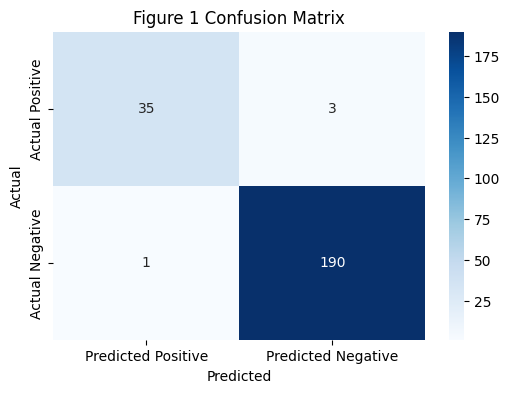

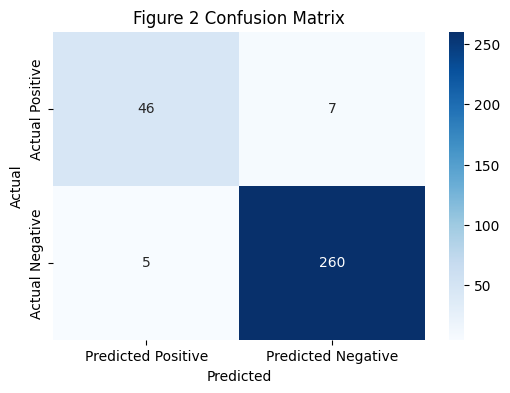

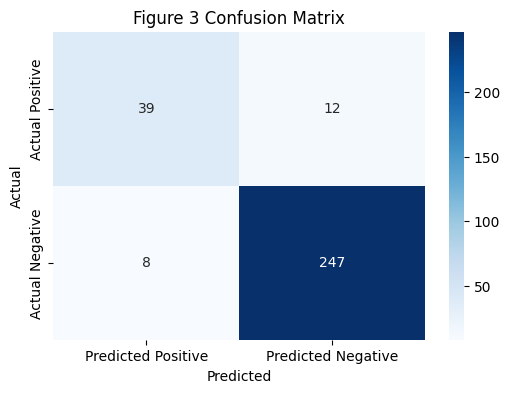

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Updated data for all figures (from Table 6)
table_6_data = [
    {"Figure": "1", "Total TP": 35, "Total FP": 1, "Total TN": 190, "Total FN": 3},
    {"Figure": "2", "Total TP": 46, "Total FP": 5, "Total TN": 260, "Total FN": 7},
    {"Figure": "3", "Total TP": 39, "Total FP": 8, "Total TN": 247, "Total FN": 12},
]

# Convert the table data into a pandas DataFrame for easier processing
df = pd.DataFrame(table_6_data)

# Visualize and save confusion matrix for each figure
for _, row in df.iterrows():
    figure = f"Figure {row['Figure']}"
    tp = row["Total TP"]
    fp = row["Total FP"]
    tn = row["Total TN"]
    fn = row["Total FN"]

    # Complete confusion matrix
    matrix = [[tp, fn], [fp, tn]]

    plt.figure(figsize=(6, 4))
    sns.heatmap(
        matrix,
        annot=True,
        fmt="d",
        cmap="Blues",
        xticklabels=["Predicted Positive", "Predicted Negative"],
        yticklabels=["Actual Positive", "Actual Negative"],
    )
    plt.title(f"{figure} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

    # Save the plot as an image
    filename = f"{figure.replace(' ', '_')}_Confusion_Matrix.png"
    plt.savefig(filename, dpi=300, bbox_inches="tight")
    plt.show()


In [8]:
from sklearn.metrics import roc_auc_score
import pandas as pd

# Updated data for all figures (from Table 6)
table_6_data = [
    {"Figure": "1", "TP": 35, "FP": 1, "TN": 190, "FN": 3},
    {"Figure": "2", "TP": 46, "FP": 5, "TN": 260, "FN": 7},
    {"Figure": "3", "TP": 39, "FP": 8, "TN": 247, "FN": 12},
]

# Results list to store calculated metrics
results = []

# Calculate metrics for each figure
for row in table_6_data:
    figure = f"Figure {row['Figure']}"
    tp = row["TP"]
    fp = row["FP"]
    tn = row["TN"]
    fn = row["FN"]

    # Metrics calculations
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1_score = (2 * precision * recall) / (precision + recall)
    accuracy = (tp + tn) / (tp + fp + tn + fn)

    # Simplified ROC-AUC calculation
    y_true = [1] * tp + [0] * fn + [1] * fp + [0] * tn  # Actual labels
    y_scores = [1] * (tp + fp) + [0] * (tn + fn)  # Predicted scores
    roc_auc = roc_auc_score(y_true, y_scores)

    # Append results
    results.append({
        "Figure": figure,
        "Precision": round(precision, 2),
        "Recall": round(recall, 2),
        "F1-Score": round(f1_score, 2),
        "Accuracy": round(accuracy, 2),
        "ROC-AUC": round(roc_auc, 2),
    })

# Convert results to a DataFrame for display
results_df = pd.DataFrame(results)

# Display the updated results
print(results_df)


     Figure  Precision  Recall  F1-Score  Accuracy  ROC-AUC
0  Figure 1       0.97    0.92      0.95      0.98     0.98
1  Figure 2       0.90    0.87      0.88      0.96     0.94
2  Figure 3       0.83    0.76      0.80      0.93     0.90


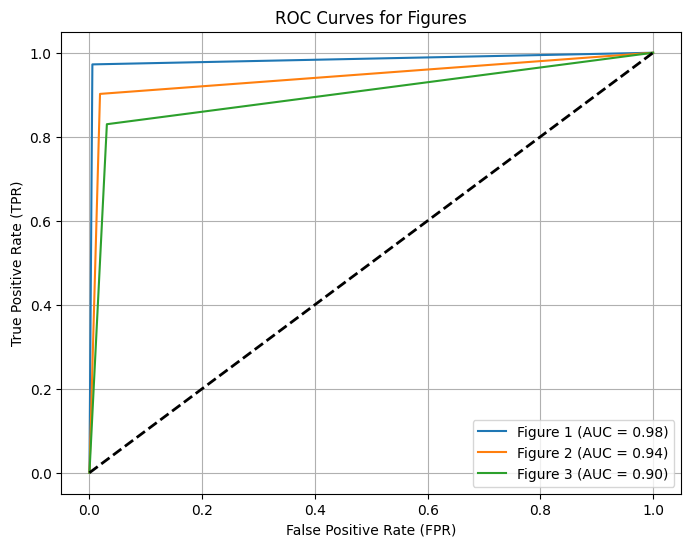

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score
import numpy as np

# Updated data for all figures (from Table 6)
table_6_data = [
    {"Figure": "1", "Total TP": 35, "Total FP": 1, "Total TN": 190, "Total FN": 3},
    {"Figure": "2", "Total TP": 46, "Total FP": 5, "Total TN": 260, "Total FN": 7},
    {"Figure": "3", "Total TP": 39, "Total FP": 8, "Total TN": 247, "Total FN": 12},
]

# Generate ROC curve for each figure using simulated data
plt.figure(figsize=(8, 6))
for row in table_6_data:
    figure = f"Figure {row['Figure']}"
    tp = row["Total TP"]
    fp = row["Total FP"]
    tn = row["Total TN"]
    fn = row["Total FN"]

    # Simulate true labels and predicted scores
    y_true = [1] * tp + [0] * fn + [1] * fp + [0] * tn
    y_scores = [1] * (tp + fp) + [0] * (tn + fn)

    # Calculate TPR, FPR, and AUC using roc_curve and roc_auc_score
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = roc_auc_score(y_true, y_scores)

    # Plot ROC curve
    plt.plot(
        fpr, tpr, label=f"{figure} (AUC = {roc_auc:.2f})"
    )

# Plot formatting
plt.plot([0, 1], [0, 1], "k--", lw=2)  # Diagonal line for random performance
plt.title("ROC Curves for Figures")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc="lower right")
plt.grid()
plt.savefig("ROC_Curves.png", dpi=300, bbox_inches="tight")  # Save the plot
plt.show()


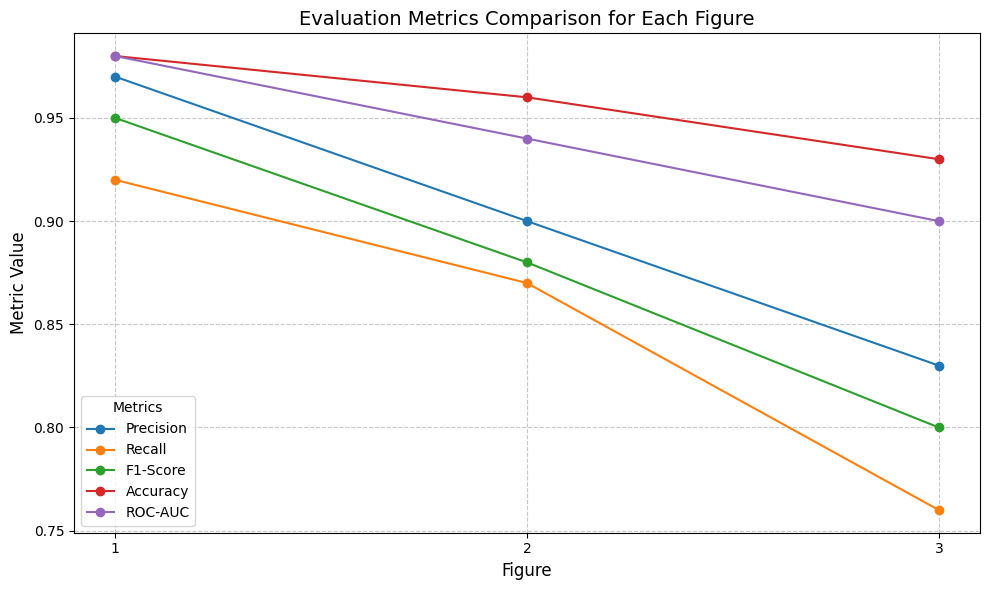

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Data for evaluation metrics
data = {
    "Figure": ["1", "2", "3"],
    "Precision": [0.97, 0.90, 0.83],
    "Recall": [0.92, 0.87, 0.76],
    "F1-Score": [0.95, 0.88, 0.80],
    "Accuracy": [0.98, 0.96, 0.93],
    "ROC-AUC": [0.98, 0.94, 0.90],
}

# Convert to DataFrame for easier manipulation
df = pd.DataFrame(data)

# Set figure size
plt.figure(figsize=(10, 6))

# Plot each metric
for metric in ["Precision", "Recall", "F1-Score", "Accuracy", "ROC-AUC"]:
    plt.plot(df["Figure"], df[metric], marker='o', label=metric)

# Formatting the plot
plt.title("Evaluation Metrics Comparison for Each Figure", fontsize=14)
plt.xlabel("Figure", fontsize=12)
plt.ylabel("Metric Value", fontsize=12)
plt.xticks(df["Figure"])
plt.legend(title="Metrics", fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.savefig("Evaluation_Metric_Comparison.png", dpi=300, bbox_inches="tight")  # Save the plot
plt.show()


##COMPLEX IMAGE ANALYSIS

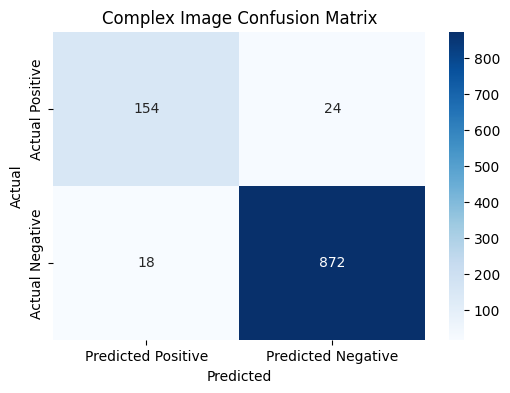

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Updated data for all figures (from Table 11)
table_11_data = [
    {"Figure": "11:", "Total TP": 154, "Total FP": 18, "Total TN": 872, "Total FN": 24},
]

# Convert the table data into a pandas DataFrame for easier processing
df = pd.DataFrame(table_11_data)

# Visualize and save confusion matrix for each figure
for _, row in df.iterrows():
    figure = f"Figure {row['Figure']}"
    tp = row["Total TP"]
    fp = row["Total FP"]
    tn = row["Total TN"]
    fn = row["Total FN"]

    # Complete confusion matrix
    matrix = [[tp, fn], [fp, tn]]

    plt.figure(figsize=(6, 4))
    sns.heatmap(
        matrix,
        annot=True,
        fmt="d",
        cmap="Blues",
        xticklabels=["Predicted Positive", "Predicted Negative"],
        yticklabels=["Actual Positive", "Actual Negative"],
    )
    plt.title(f"Complex Image Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

    # Save the plot as an image
    filename = f"Complex_Image_Confusion_Matrix.png"
    plt.savefig(filename, dpi=300, bbox_inches="tight")
    plt.show()


In [12]:
from sklearn.metrics import roc_auc_score
import pandas as pd

# Updated data for all figures (from Table 11)
table_11_data = [
    {"Figure": "11", "TP": 154, "FP": 18, "TN": 872, "FN": 24},
]

# Results list to store calculated metrics
results = []

# Calculate metrics for each figure
for row in table_11_data:
    figure = f"Figure {row['Figure']}"
    tp = row["TP"]
    fp = row["FP"]
    tn = row["TN"]
    fn = row["FN"]

    # Metrics calculations
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1_score = (2 * precision * recall) / (precision + recall)
    accuracy = (tp + tn) / (tp + fp + tn + fn)

    # Simplified ROC-AUC calculation
    y_true = [1] * tp + [0] * fn + [1] * fp + [0] * tn  # Actual labels
    y_scores = [1] * (tp + fp) + [0] * (tn + fn)  # Predicted scores
    roc_auc = roc_auc_score(y_true, y_scores)

    # Append results
    results.append({
        "Figure": figure,
        "Precision": round(precision, 2),
        "Recall": round(recall, 2),
        "F1-Score": round(f1_score, 2),
        "Accuracy": round(accuracy, 2),
        "ROC-AUC": round(roc_auc, 2),
    })

# Convert results to a DataFrame for display
results_df = pd.DataFrame(results)

# Display the updated results
print(results_df)


      Figure  Precision  Recall  F1-Score  Accuracy  ROC-AUC
0  Figure 11        0.9    0.87      0.88      0.96     0.94


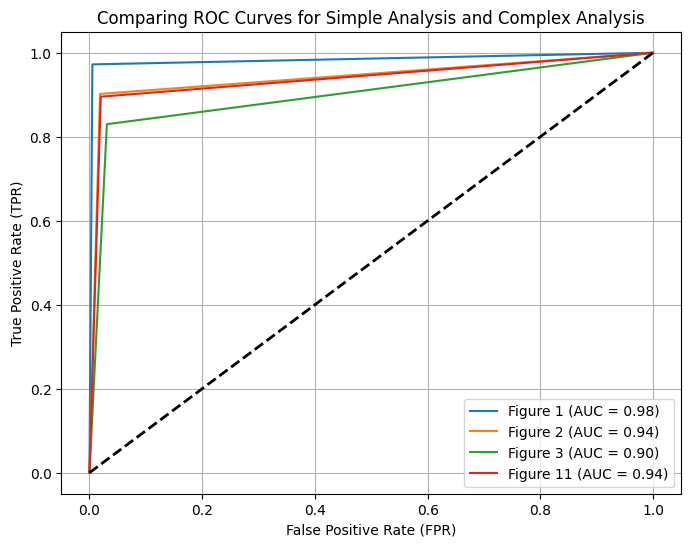

In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score
import numpy as np

# Updated data for all figures (from Table 6)
table_6and11_data = [
    {"Figure": "1", "Total TP": 35, "Total FP": 1, "Total TN": 190, "Total FN": 3},
    {"Figure": "2", "Total TP": 46, "Total FP": 5, "Total TN": 260, "Total FN": 7},
    {"Figure": "3", "Total TP": 39, "Total FP": 8, "Total TN": 247, "Total FN": 12},
    {"Figure": "11", "Total TP": 154, "Total FP": 18, "Total TN": 872, "Total FN": 24},
]

# Generate ROC curve for each figure using simulated data
plt.figure(figsize=(8, 6))
for row in table_6and11_data:
    figure = f"Figure {row['Figure']}"
    tp = row["Total TP"]
    fp = row["Total FP"]
    tn = row["Total TN"]
    fn = row["Total FN"]

    # Simulate true labels and predicted scores
    y_true = [1] * tp + [0] * fn + [1] * fp + [0] * tn
    y_scores = [1] * (tp + fp) + [0] * (tn + fn)

    # Calculate TPR, FPR, and AUC using roc_curve and roc_auc_score
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = roc_auc_score(y_true, y_scores)

    # Plot ROC curve
    plt.plot(
        fpr, tpr, label=f"{figure} (AUC = {roc_auc:.2f})"
    )

# Plot formatting
plt.plot([0, 1], [0, 1], "k--", lw=2)  # Diagonal line for random performance
plt.title("Comparing ROC Curves for Simple Analysis and Complex Analysis")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc="lower right")
plt.grid()
plt.savefig("Comparing_ROC_Curves.png", dpi=300, bbox_inches="tight")  # Save the plot
plt.show()


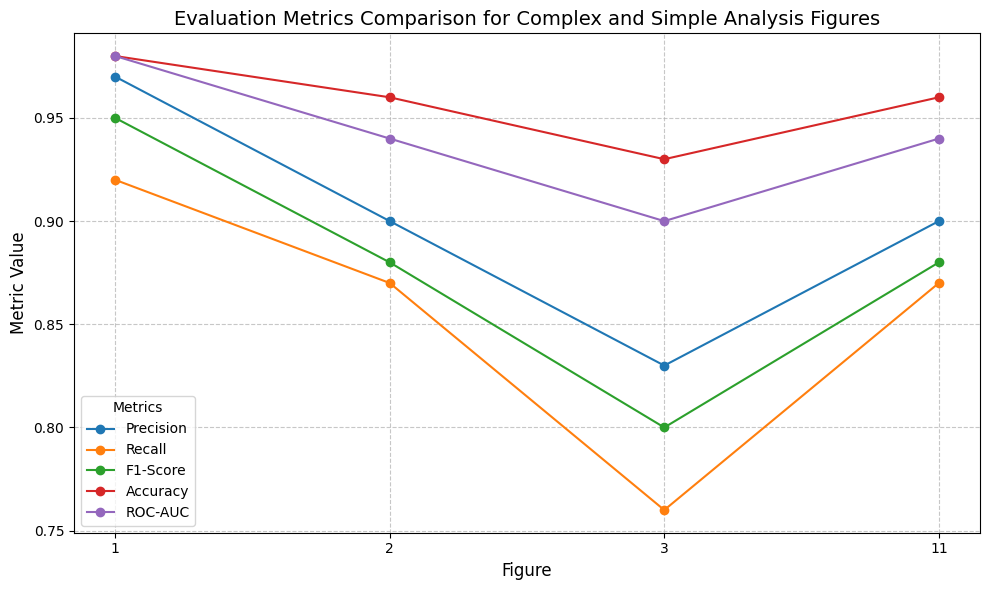

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Data for evaluation metrics
allData = {
    "Figure": ["1", "2", "3", "11"],
    "Precision": [0.97, 0.90, 0.83, 0.9],
    "Recall": [0.92, 0.87, 0.76, 0.87],
    "F1-Score": [0.95, 0.88, 0.80, 0.88],
    "Accuracy": [0.98, 0.96, 0.93, 0.96],
    "ROC-AUC": [0.98, 0.94, 0.90, 0.94],
}

# Convert to DataFrame for easier manipulation
df = pd.DataFrame(allData)

# Set figure size
plt.figure(figsize=(10, 6))

# Plot each metric
for metric in ["Precision", "Recall", "F1-Score", "Accuracy", "ROC-AUC"]:
    plt.plot(df["Figure"], df[metric], marker='o', label=metric)

# Formatting the plot
plt.title("Evaluation Metrics Comparison for Complex and Simple Analysis Figures", fontsize=14)
plt.xlabel("Figure", fontsize=12)
plt.ylabel("Metric Value", fontsize=12)
plt.xticks(df["Figure"])
plt.legend(title="Metrics", fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.savefig("Evaluation_Metric_Comparison_All.png", dpi=300, bbox_inches="tight")  # Save the plot
plt.show()